In [12]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import os
import sys
import glob

In [3]:
DATA_DIR = '../data/EFOSC/20151004_test/test_diff_standards/'
CODE_DIR = '../code'
FIG_DIR = '../figures'

In [7]:
sys.path.append(CODE_DIR)
from util import calc_wavelength

In [8]:
filename = 'tASASSN-15oz_20151003_Gr13_Free_slit1.0_57678_1_e_{}.fits'
endings = ['sensl745a', 'sensLTT7379']

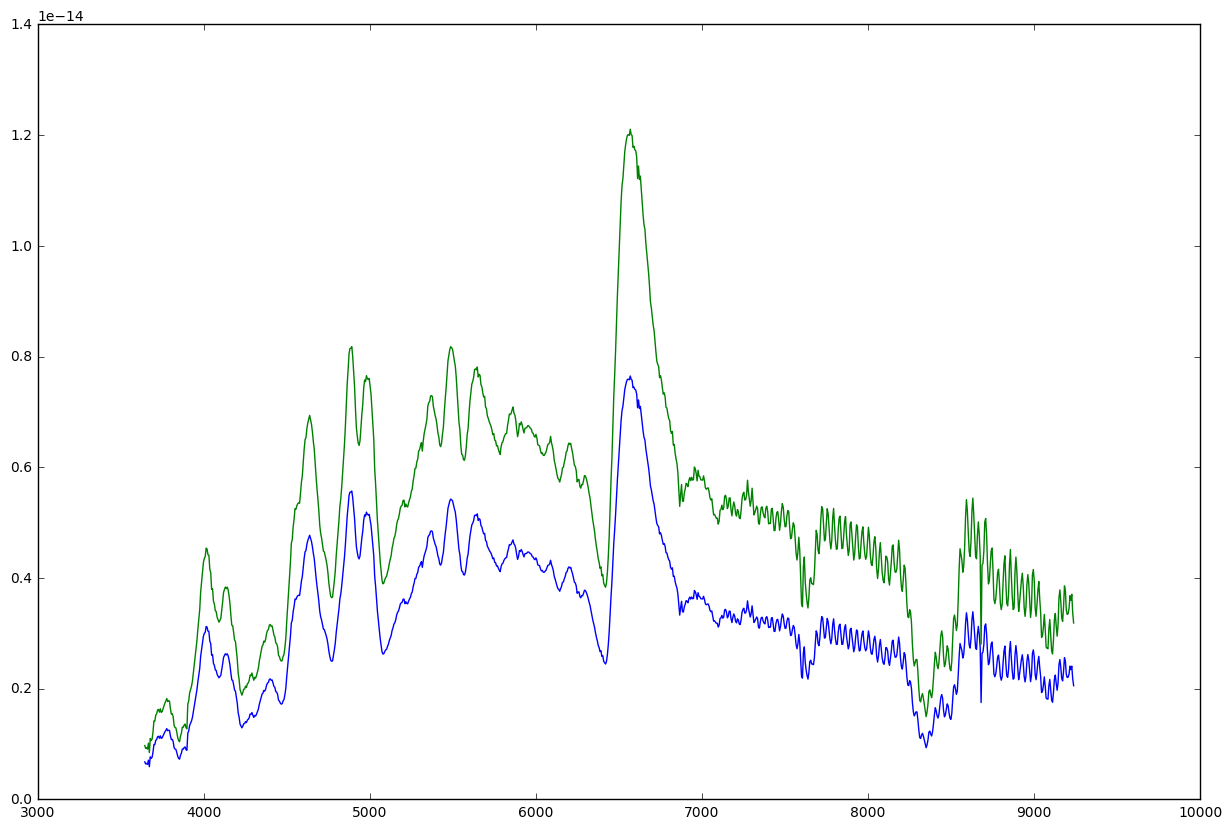

In [10]:
fig = pyplot.figure(figsize = [15, 10])
ax_spec = fig.add_subplot(1,1,1)
pixels = np.arange(1, 1016)
for end in endings:
    ofile = fits.open(os.path.join(DATA_DIR, filename.format(end)))
    data = ofile[0].data
    header = ofile[0].header
    wl = calc_wavelength(header, pixels)
    ax_spec.plot(wl, data[0,0,:])

That's way too big a difference - let's look at the sensitivity curves

In [25]:
flist = glob.glob(os.path.join(DATA_DIR, 'sens*Free*57679_1.fits'))

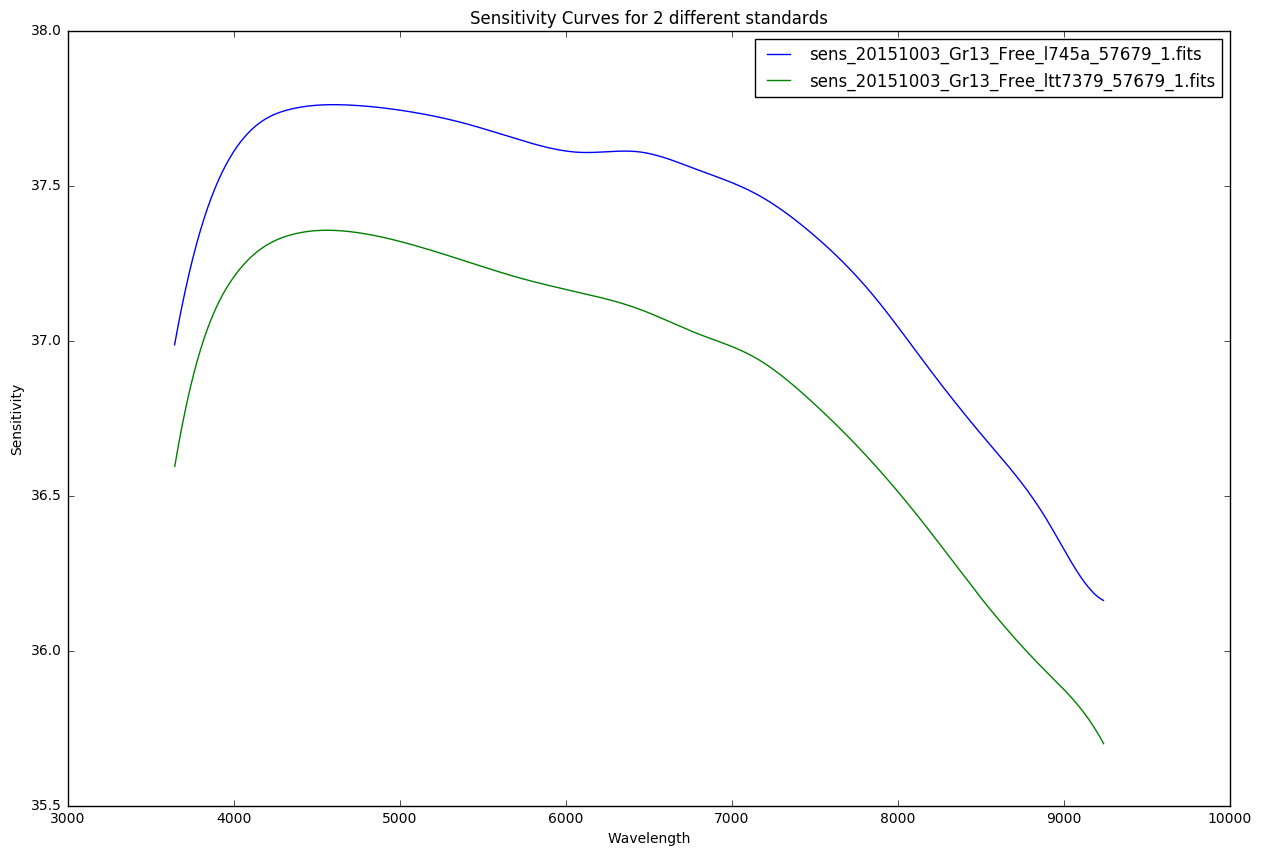

In [26]:
fig = pyplot.figure(figsize = [15, 10])
ax_sens = fig.add_subplot(1,1,1)
pixels = np.arange(1, 1016)
for ifile in flist:
    ofile = fits.open(ifile)
    data = ofile[0].data
    header = ofile[0].header
    wl = calc_wavelength(header, pixels)
    ax_sens.plot(wl, data, label = os.path.basename(ifile))
ax_sens.legend(loc = 'best')
ax_sens.set_xlabel('Wavelength')
ax_sens.set_ylabel('Sensitivity')
ax_sens.set_title('Sensitivity Curves for 2 different standards')

In [27]:
header_l745 = fits.getheader(flist[0], 0)
header_ltt = fits.getheader(flist[1], 0)
for keyword in header_l745.keys():
    if header_l745[keyword] != header_ltt[keyword]:
        print(keyword, header_l745[keyword], header_ltt[keyword])

IRAF-TLM 2016-10-18T20:28:51 2016-10-18T23:35:04
DATE 2016-10-18T20:28:51 2016-10-18T23:35:04
OBJECT L745a LTT7379
RA 115.087579 279.11018
DEC -17.4171 -44.3099
EXPTIME 100.0156 60.0096
MJD-OBS 57299.39134651 57298.98478846
DATE-OBS 2015-10-04T09:23:32.338 2015-10-03T23:38:05.723
UTC 33805.0 85078.0
LST 19889.883 71066.708
CRVAL1 3644.8330078125 3645.8330078125
ESO ADA ABSROT END -150.4954 192.40119
ESO ADA ABSROT START -150.2625 192.97573
ESO ADA GUID DEC -17.57109 -44.08438
ESO ADA GUID RA 115.15208 279.00755
ESO ADA POSANG -26.695 133.293
ESO DET EXP NO 10041 9401
ESO DET EXP RDTTIME 22.39 22.354
ESO DET EXP XFERTIM 22.304 22.333
ESO DET SHUT TMCLOS 0.079 0.062
ESO DET SHUT TMOPEN 0.048 0.043
ESO DET TLM4 END 284.2 284.9
ESO DET TLM4 START 284.2 284.9
ESO DET TLM5 END 283.8 284.4
ESO DET TLM5 START 283.8 284.4
ESO DET TLM6 END 287.4 287.7
ESO DET TLM6 START 287.4 287.7
ESO DET WIN1 DIT1 100.015633 60.009583
ESO DET WIN1 DKTM 100.0871 60.092
ESO DET WIN1 UIT1 100.0 60.0
ESO OBS EXECT

In [34]:
flist = glob.glob(os.path.join(DATA_DIR, '*.fits'))
for ifile in flist:
    try:
        print(os.path.basename(ifile), fits.getval(ifile, 'MAGSTD', 0))
    except:
        pass

sens_20151003_Gr13_GG495_l745a_57678_1.fits 13.03
tLTT7379_20151003_Gr13_GG495_slit1.5_57678_1_sensLTT7379.fits 99.99
atmo_tLTT7379_20151003_Gr13_Free_slit1.0_57678_1_ex.fits 99.99
tL745a_20151003_Gr13_Free_slit1.0_57678_1_sensLTT7379.fits 13.03
sens_20151003_Gr13_Free_l745a_57678_1_2ord.fits 13.03
tLTT7379_20151003_Gr13_GG495_slit1.0_57678_1_ex_sensl745a.fits 99.99
tLTT7379_20151003_Gr13_Free_slit1.0_57678_1_clean_sensLTT7379.fits 99.99
tL745a_20151003_Gr13_Free_slit1.5_57678_1_sensLTT7379.fits 13.03
tLTT7379_20151003_Gr13_GG495_slit1.0_57678_1_sensLTT7379.fits 99.99
atmo_tLTT7379_20151003_Gr13_GG495_slit1.0_57678_1_ex.fits 99.99
atmo_tL745a_20151003_Gr13_GG495_slit1.0_57678_1_ex.fits 13.03
tL745a_20151003_Gr13_Free_slit1.0_57678_1_clean_sensLTT7379.fits 13.03
tLTT7379_20151003_Gr13_GG495_slit1.0_57678_1_sensl745a.fits 99.99
tL745a_20151003_Gr13_GG495_slit1.5_57678_1_sensl745a.fits 13.03
tL745a_20151003_Gr13_GG495_slit1.5_57678_1_sensLTT7379.fits 13.03
sens_20151003_Gr13_Free_ltt7379_

In [35]:
pwd

'/dark/bostroem/research/ASASSN15oz/notebooks'

In [36]:
glob.glob(os.path.join(DATA_DIR, 'sens*'))

['../data/EFOSC/20151004_test/test_diff_standards/sens_20151003_Gr13_GG495_l745a_57678_1.fits',
 '../data/EFOSC/20151004_test/test_diff_standards/sens_20151003_Gr13_Free_l745a_57678_1_2ord.fits',
 '../data/EFOSC/20151004_test/test_diff_standards/sens_20151003_Gr13_Free_ltt7379_57679_1_2ord.fits',
 '../data/EFOSC/20151004_test/test_diff_standards/sens_20151003_Gr13_Free_l745a_57679_1.fits',
 '../data/EFOSC/20151004_test/test_diff_standards/sens_20151003_Gr13_Free_l745a_57678_1.fits',
 '../data/EFOSC/20151004_test/test_diff_standards/sens_20151003_Gr13_Free_l745a_57679_1_2ord.fits',
 '../data/EFOSC/20151004_test/test_diff_standards/sens_20151003_Gr13_GG495_ltt7379_57679_1.fits',
 '../data/EFOSC/20151004_test/test_diff_standards/sens_20151003_Gr13_GG495_l745a_57679_1.fits',
 '../data/EFOSC/20151004_test/test_diff_standards/sens_20151003_Gr13_Free_ltt7379_57679_1.fits']